In [12]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [6]:
connection = sqlite3.connect("../db.sqlite3")
query = (
    "SELECT name, price, quantity, datetime "
    "FROM restaurant_product "
    "INNER JOIN  restaurant_orderitem "
    "ON restaurant_product.id = restaurant_orderitem.product_id "
    "INNER JOIN restaurant_order "
    "ON restaurant_orderitem.order_id = restaurant_order.id"
)

data = pd.read_sql(query, connection)

connection.close()

In [8]:
df = pd.DataFrame(data)
df

,name,price,quantity,datetime
0,Plain Papadum,0.80,2,2019-08-03 20:25:00
1,King Prawn Balti,12.95,1,2019-08-03 20:25:00
2,Garlic Naan,2.95,1,2019-08-03 20:25:00
3,Mushroom Rice,3.95,1,2019-08-03 20:25:00
4,Paneer Tikka Masala,8.95,1,2019-08-03 20:25:00
...,...,...,...,...
74813,House Red wine 75cl,17.95,2,2016-05-18 18:53:00
74814,House Red wine 75cl,17.95,2,2016-05-14 19:28:00
74815,House Red wine 75cl,17.95,2,2016-05-10 13:18:00
74816,House white wine 75cl,17.95,1,2016-04-07 19:04:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

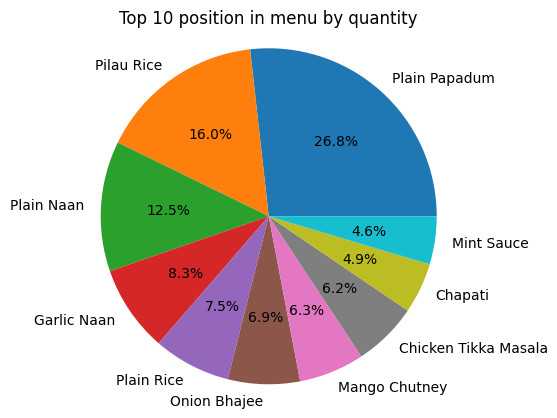

In [23]:
product_quantity = df.groupby("name")["quantity"].sum()
top_products = product_quantity.sort_values(ascending=False)[:10]

plt.pie(top_products, labels=top_products.index, autopct="%1.1f%%")
plt.title("Top 10 position in menu by quantity")
plt.axis("equal")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

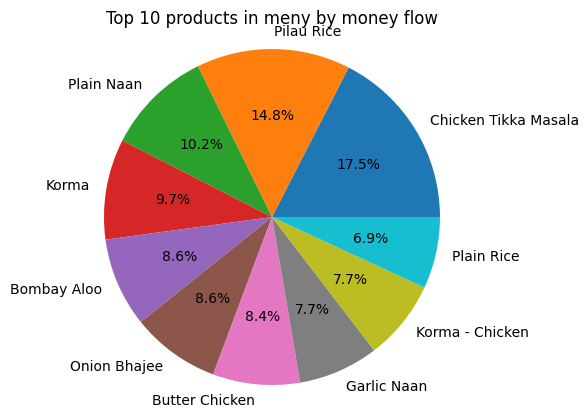

In [30]:
df["Item Price"] = df["price"] * df["quantity"]
product_money_flow = df.groupby("name")["Item Price"].sum()
top_products_by_money_flow = product_money_flow.sort_values(ascending=False)[:10]

plt.pie(top_products_by_money_flow, labels=top_products_by_money_flow.index, autopct="%1.1f%%")
plt.title("Top 10 products in meny by money flow")
plt.axis("equal")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

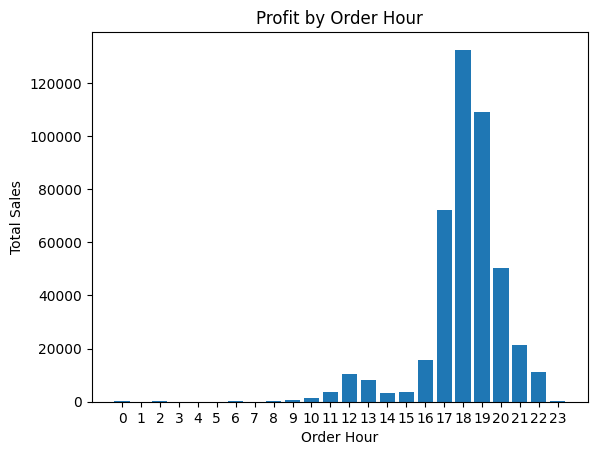

In [50]:
df["Order Hour"] = pd.to_datetime(df["datetime"]).dt.hour
sold_by_hours = df.groupby("Order Hour")["Item Price"].sum()

fig, ax = plt.subplots()
ax.bar(x=sold_by_hours.index, height=sold_by_hours.values)
ax.set_xlabel("Order Hour")
ax.set_ylabel("Total Sales")
ax.set_title("Profit by Order Hour")
ax.set_xticks(range(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

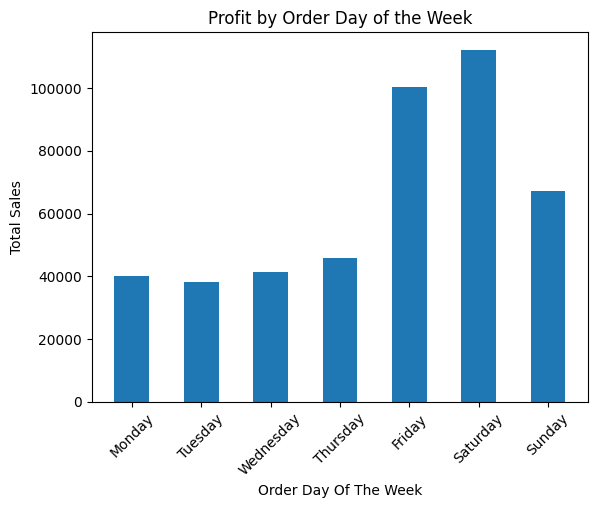

In [62]:
df["Order Day Of The Week"] = pd.to_datetime(df["datetime"]).dt.dayofweek

sold_by_day = df.groupby("Order Day Of The Week")["Item Price"].sum()

_, ax = plt.subplots()
ax.bar(x=sold_by_day.index, height=sold_by_day.values, width=0.5)
ax.set_xlabel("Order Day Of The Week")
ax.set_ylabel("Total Sales")
ax.set_title("Profit by Order Day of the Week")
ax.set_xticks(range(7))
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xticks(rotation=45)
plt.show()